# Dr. Semmelweis and the effect of handwashing

Dr. Ignaz Semmelweis (1818-1865) was a Hungarian physician known for his pioneering work on hand hygiene and infection control in healthcare settings. Working as an obstetrician in Vienna General Hospital in the mid-19th century, Semmelweis observed significantly higher mortality rates among women who gave birth in the hospital compared to those who gave birth at home. He hypothesized that doctors and medical students were transmitting infectious agents to the women during childbirth and realized that hand hygiene was a critical factor in preventing the spread of infections. He implemented strict handwashing protocols, resulting in a significant reduction in the mortality rate in the maternity ward. However, Semmelweis faced resistance from the medical community and died unrecognized.

Despite initial resistance, Semmelweis' work laid the foundation for modern infection control practices. His discovery of the importance of hand hygiene in healthcare settings has become a fundamental element of infection control, saving countless lives. Today, Semmelweis is remembered as a pioneering figure in the field of public health who made significant contributions to reducing the spread of infectious diseases, and his work continues to influence modern infection control protocols.

In modern healthcare, data science plays a vital role in analyzing large datasets, conducting statistical analyses, and developing predictive models to gain insights into disease patterns, patient outcomes, and treatment effectiveness. Data science methods such as machine learning, data visualization, and statistical analysis are used to analyze complex healthcare data, including electronic health records, genomic data, and real-time health data from wearables and other devices, to inform clinical decision-making, optimize healthcare operations, and improve patient outcomes.

So while Semmelweis' work was not specifically related to data science, it underscores the importance of data-driven approaches in healthcare and the value of using data to inform medical practices and interventions for better patient care.

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
# read the yearly dataset
yearly_df = pd.read_csv("yearly_deaths_by_clinic.csv")
yearly_df.head()

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1


In [60]:
yearly_df.shape

(12, 4)

In [61]:
yearly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes


In [62]:
# check NaN values
print(yearly_df.isnull().sum())

year      0
births    0
deaths    0
clinic    0
dtype: int64


In [63]:
# check duplicates rows
print(yearly_df.duplicated().sum())

0


In [64]:
# number of death per clinic
yearly_df.groupby("clinic") ["deaths"].sum()

clinic
clinic 1    1989
clinic 2     691
Name: deaths, dtype: int64

The results above show the number of births and deaths in two clinics from the years 1841 to 1846. It is evident that the number of deaths in Clinic 1 is higher compared to Clinic 2.

In [65]:
# add column deaths_proportion
yearly_df["deaths_proportion"] = yearly_df["deaths"] / yearly_df["births"]
yearly_df.head()

,year,births,deaths,clinic,deaths_proportion
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015


In [66]:
# split the dataset into two separate datasets for each clinic
clinic_1 = yearly_df[yearly_df["clinic"] == "clinic 1"]
clinic_2 = yearly_df[yearly_df["clinic"] == "clinic 2"]

In [67]:
clinic_1.head()

,year,births,deaths,clinic,deaths_proportion
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015


In [68]:
clinic_2.head()

,year,births,deaths,clinic,deaths_proportion
6,1841,2442,86,clinic 2,0.035217
7,1842,2659,202,clinic 2,0.075968
8,1843,2739,164,clinic 2,0.059876
9,1844,2956,68,clinic 2,0.023004
10,1845,3241,66,clinic 2,0.020364


Text(0, 0.5, 'Number of Deaths')

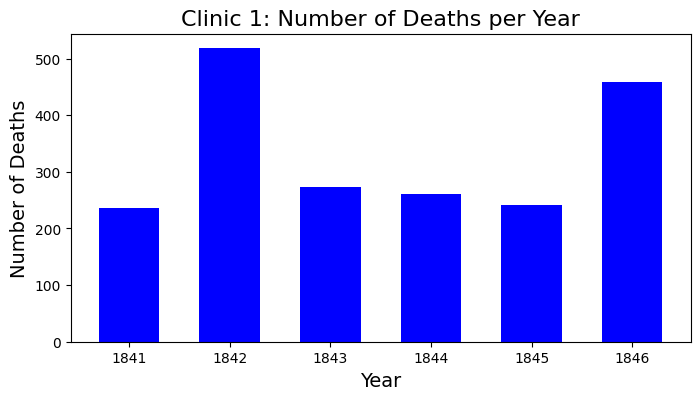

In [69]:
# visualize number of deaths every year in clinic 1
fig,ax = plt.subplots(figsize = (8,4))
plt.bar(clinic_1.year, clinic_1.deaths, width= 0.6, color= "blue")
plt.title("Clinic 1: Number of Deaths per Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Deaths", fontsize=14)

Text(0, 0.5, 'Number of Deaths')

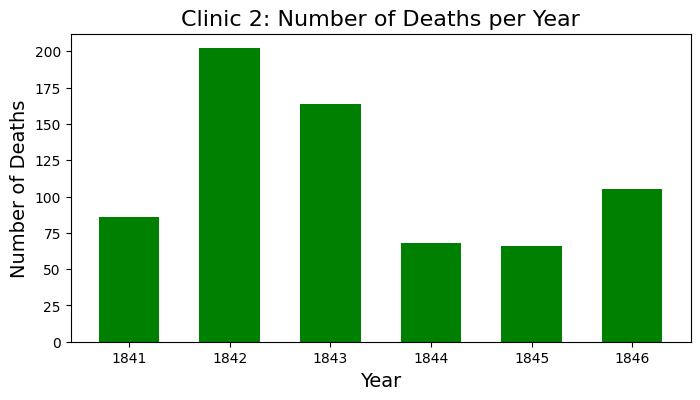

In [70]:
# visualize number of deaths every year in clinic 2
fig,ax = plt.subplots(figsize = (8,4))
plt.bar(clinic_2.year, clinic_2.deaths, width= 0.6, color= "green")
plt.title("Clinic 2: Number of Deaths per Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Deaths", fontsize=14)

It appears that 1842 was a particularly challenging year in both Clinic 1 and Clinic 2, with 518 and 202 recorded deaths, respectively. Now, let's proceed to plot the proportion of deaths in Clinic 1 and Clinic 2.

<Axes: xlabel='Year', ylabel='Deaths Proportion'>

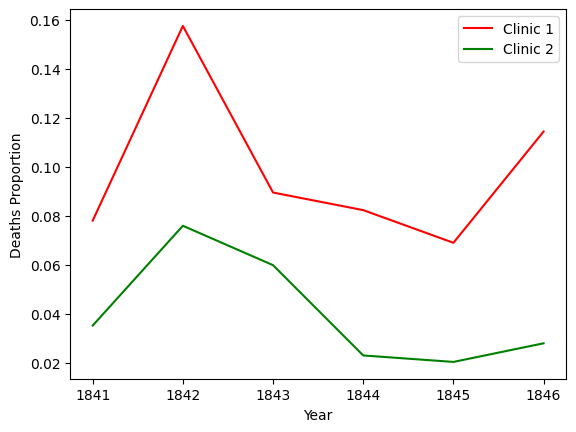

In [78]:
ax = clinic_1.plot(x="year", 
                  y="deaths_proportion", 
                  label="Clinic 1", color="red")
clinic_2.plot(x="year", 
              y="deaths_proportion", 
              label="Clinic 2", ax=ax, 
              ylabel="Deaths Proportion",
              xlabel="Year",
              color="green")

Upon further investigation, Dr. Semmelweis discovered that Clinic 1 had a higher number of medical students who spent significant time in the autopsy room as part of their studies. He realized that the handling of corpses by these students was spreading bacteria that could be transferred to the women during childbirth, resulting in deadly childbed fever and contributing to the high mortality rates.

In [93]:
# read the monthly dataset
monthly_df = pd.read_csv("monthly_deaths.csv")
monthly_df.head()

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2


In [94]:
monthly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    98 non-null     object
 1   births  98 non-null     int64 
 2   deaths  98 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.4+ KB


In [95]:
# calculate deaths proportion per month
monthly_df["deaths_proportion"] = monthly_df["deaths"] / monthly_df["births"]
monthly_df.head(5)

,date,births,deaths,deaths_proportion
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


In the summer of 1847, Dr. Semmelweis implemented a mandatory handwashing policy for doctors in an attempt to reduce the number of deaths. We now have monthly data available, which allows us to track the number of deaths before and after the handwashing intervention was introduced to determine its impact.

In [110]:
# check types
monthly_df.dtypes

date                 datetime64[ns]
births                        int64
deaths                        int64
deaths_proportion           float64
dtype: object

In [96]:
# change data type of "date" column to datetime
monthly_df['date'] =  pd.to_datetime(monthly_df['date'])

In [97]:
# label the date at which handwashing started to "start_handwashing"
start_handwashing = pd.to_datetime('1847-06-01')
# split monthly into before and after handwashing_start
before_washing = monthly_df[monthly_df["date"] < start_handwashing]
after_washing = monthly_df[monthly_df["date"] >= start_handwashing]

Text(0, 0.5, 'Deaths Proportion')

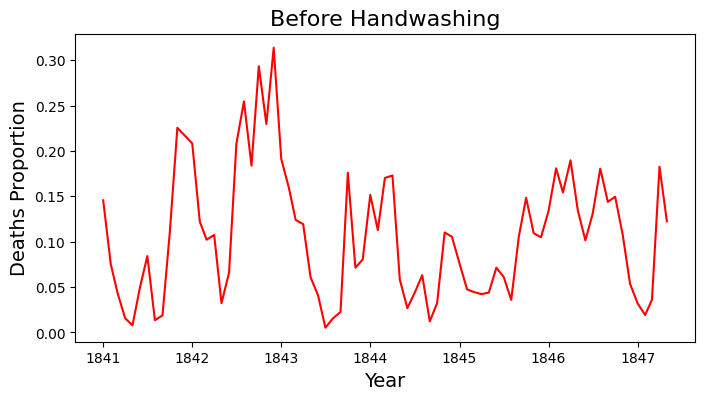

In [108]:
# before handwashing
fig,ax = plt.subplots(figsize = (8,4))
x= before_washing["date"]
y= before_washing["deaths_proportion"]
plt.plot(x, y, color= "red")
plt.title("Before Handwashing", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Deaths Proportion", fontsize=14)

Text(0, 0.5, 'Deaths Proportion')

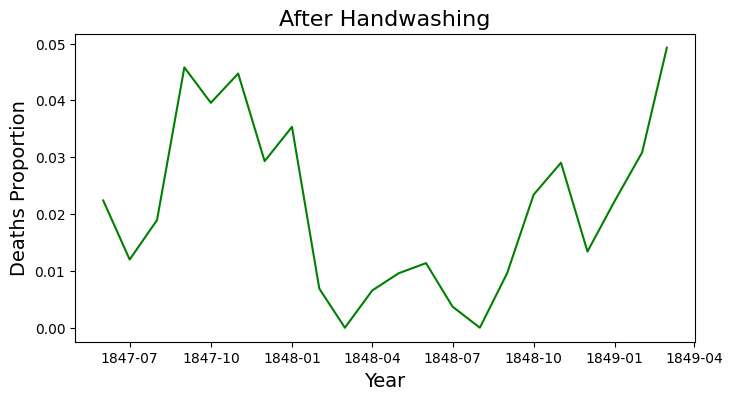

In [114]:
# after handwashing
fig,ax = plt.subplots(figsize=(8,4))
x = after_washing["date"]
y = after_washing["deaths_proportion"]
plt.plot(x, y, color="green")
plt.title("After Handwashing", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Deaths Proportion", fontsize=14)

For better visualization, let's create a combined chart that displays both plots side by side for easy comparison.

<Axes: xlabel='Year', ylabel='Deaths Proportion'>

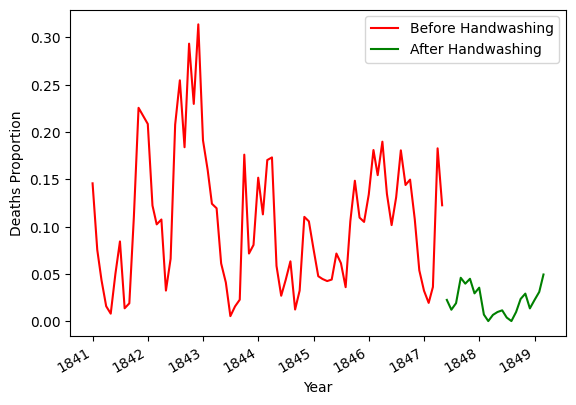

In [112]:
ax= before_washing.plot(x="date", 
                        y="deaths_proportion", 
                        label="Before Handwashing", 
                        color="red")
after_washing.plot(x="date", 
                   y="deaths_proportion", 
                   label="After Handwashing", 
                   ax=ax, ylabel="Deaths Proportion", 
                   xlabel="Year", 
                   color="green") 

The difference is evident! The proportion of deaths showed a significant decrease after handwashing was made mandatory. Now, let's calculate the exact average reduction in the proportion of deaths attributable to handwashing.

In [116]:
before_proportion = before_washing["deaths_proportion"]
after_proportion = after_washing["deaths_proportion"]
before_proportion.mean()

0.10504998260908789

In [117]:
after_proportion.mean()

0.021093375097254535

In [118]:
# difference between both proportions
mean_diff = after_proportion.mean() - before_proportion.mean()
mean_diff

-0.08395660751183336

The negative sign indicates a decrease, therefore, handwashing reduced the proportion of deaths from 10% to 2%, resulting in a decrease of approximately 8%.

Dr. Semmelweis' theory that childbed fever was caused by bacteria from autopsy room corpses, supported by solid evidence, was unfortunately ridiculed by contemporary scientists. Despite publishing raw data in long tables, Semmelweis did not include graphs or confidence intervals, which were uncommon in medical science during the 1800s. This lack of statistical presentation may have contributed to the rejection of his discovery by the medical community.